# Popular Song Dataset (from Spotify API)

```
# high-popularity
https://drive.google.com/file/d/1uKKx34Ef2xKko0OniwtkhDncLFpxJD98/view?usp=drive_link

# low-popularity
https://drive.google.com/file/d/1L3B7yHCmYfH7Dmz_2FyprUDrOFKiOcio/view?usp=drive_link
```

In [1]:
# Import gdown to download the data, install it if not exist
try:
    import gdown
except:
    !pip install gdown
    import gdown

In [3]:
import os

# download the file from Google Drive using file's ID
def download_file(file_id, output_path):
    folder = os.path.dirname(output_path)
    if folder and not os.path.exists(folder):
        os.makedirs(folder)
        
    if not os.path.exists(output_path):
        url = f"https://drive.google.com/uc?id={file_id}"
        print(f"Downloading file from Google Drive...")
        gdown.download(url, output_path, quiet=False)
    else:
        print(f"{output_path} already exists. Skipping download.")

# ID of the files
file1_id = "1uKKx34Ef2xKko0OniwtkhDncLFpxJD98"
file2_id = "1L3B7yHCmYfH7Dmz_2FyprUDrOFKiOcio"

# Folder to store the data
data_dir = "data"

# Path to the folder
data1_path = os.path.join(data_dir, "high_popularity_spotify_data.csv")
data2_path = os.path.join(data_dir, "low_popularity_spotify_data.csv")

# Download both files into a folder
download_file(file1_id, data1_path)
download_file(file2_id, data2_path)

Downloading...
From: https://drive.google.com/uc?id=1uKKx34Ef2xKko0OniwtkhDncLFpxJD98
To: /Users/eldarsatyndiev/Documents/projects/spotify-song-popularity-prediction/data/high_popularity_spotify_data.csv
100%|████████████████████████████████████████| 730k/730k [00:00<00:00, 1.81MB/s]


Downloading...
From: https://drive.google.com/uc?id=1L3B7yHCmYfH7Dmz_2FyprUDrOFKiOcio
To: /Users/eldarsatyndiev/Documents/projects/spotify-song-popularity-prediction/data/low_popularity_spotify_data.csv
100%|██████████████████████████████████████| 1.36M/1.36M [00:00<00:00, 2.71MB/s]


## Vertically stacking both datasets


Because "high popularity songs" are in one dataset and "low popularity songs" are in another, we need to vertically stack them

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


def load_total_music_dataset(force: bool = False):
  df1 = pd.read_csv(data1_path)
  df1["popular"] = 1


  df2 = pd.read_csv(data2_path)
  df2["popular"] = 0

  # Combine two datasets
  df = pd.concat([df1, df2], axis=0, ignore_index=True)
  diff = set(df1.columns).symmetric_difference(df2.columns)
  assert len(diff) == 0, diff

  return df

# Load the data
df = load_total_music_dataset()

# Take a quick tour of the data

## Audio Features


|Feature |	Description|
|--------|--------------|
|Energy| A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.|
|Tempo |The speed of a track, measured in beats per minute (BPM).|
|Danceability|	A score describing how suitable a track is for dancing based on tempo, rhythm stability, beat strength and overall regularity.|
|Loudness|	The overall loudness of a track in decibels (dB). Higher values indicate louder tracks overall.|
|Liveness|	The likelihood of a track being performed live. Higher values suggest more audience presence.|
|Valence|	The overall musical positiveness(emotion) of a track. High valence sounds happy; low valence sounds sad or angry.|
|Speechiness|	Measures the presence of spoken words.|
|Instrumentalness|	The likelihood a track contains no vocals. Values closer to 1.0 suggest solely instrumental tracks.|
|Mode|	Indicates the modality of the track.|
|Key|	The musical key, represented as an integer from 0 to 11, mapping to standard Pitch class notation.|
|Duration_ms|	The length of the track in milliseconds.|
|Acousticness|	A confidence measure of whether a track is acoustic(1) or not(0).|

## Descriptive features

|Feature|	Description|
|--------|--------------|
|Track Name|	The name of the track.|
|Track Artist|	The artist(s) performing the track.|
|Track Album Name|	The album in which the track is featured.|
|Track Album Release Date|	The release date of the album containing the track.|
|Track ID|	A unique identifier assigned to the track by Spotify.|
|Track Album ID|	A unique identifier for the album.|
|Playlist Name|	The name of the playlist where the track is included.|
|Playlist Genre|	The main genre associated with the playlist (e.g., pop, rock, classical).|
|Playlist Subgenre|	A more specific subgenre tied to the playlist (e.g., indie pop, punk rock).|
|Playlist ID|	A unique identifier for the playlist.|
|Track Popularity|	A score (0–100) which is calculated based on total number of streams in relation to other songs.|

# Exploratory Data Analysis

In [6]:
# Explore the first rows of the data
df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id,popular
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M,1


In [7]:
# Describe the numberical features of the data
df.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness,popular
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4831.000000,4830.000000,4830.000000,4830.000000,4.830000e+03,4830.000000,4831.000000
mean,0.586691,118.269293,0.622311,-9.281627,0.167613,0.481930,3.936646,0.101738,54.761126,0.201053,0.562112,5.233333,2.061508e+05,0.341217,0.348996
std,0.246263,28.512615,0.187706,7.129396,0.124429,0.258036,0.409712,0.101032,19.828573,0.351918,0.496178,3.580857,8.174556e+04,0.325382,0.476702
min,0.000202,48.232000,0.058900,-48.069000,0.021000,0.029600,1.000000,0.021900,11.000000,0.000000,0.000000,0.000000,3.537500e+04,0.000004,0.000000
25%,0.442250,96.063000,0.525000,-10.297750,0.095400,0.275000,4.000000,0.038600,41.000000,0.000000,0.000000,2.000000,1.590000e+05,0.052925,0.000000
50%,0.633000,118.059500,0.653000,-7.191000,0.118000,0.483000,4.000000,0.056100,56.000000,0.000091,1.000000,5.000000,1.948665e+05,0.224500,0.000000
75%,0.777000,136.723500,0.758000,-5.336750,0.195000,0.690000,4.000000,0.118000,72.000000,0.200500,1.000000,8.000000,2.334780e+05,0.590000,1.000000
max,0.998000,241.426000,0.979000,1.318000,0.979000,0.987000,5.000000,0.927000,100.000000,0.991000,1.000000,11.000000,1.355260e+06,0.996000,1.000000


In [8]:
# Check for duplicates
duplicate = df.duplicated().any().sum()
duplicate

np.int64(0)

In [9]:
# Check for missing values
df.isna().sum()

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
time_signature              1
speechiness                 1
track_popularity            0
track_href                  1
uri                         1
track_album_name            1
playlist_name               0
analysis_url                1
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
type                        1
playlist_id                 0
popular                     0
dtype: int64

In [10]:
# Remove the rows with missing values
df = df[~df.isnull().any(axis=1)]

In [11]:
df.columns

Index(['energy', 'tempo', 'danceability', 'playlist_genre', 'loudness',
       'liveness', 'valence', 'track_artist', 'time_signature', 'speechiness',
       'track_popularity', 'track_href', 'uri', 'track_album_name',
       'playlist_name', 'analysis_url', 'track_id', 'track_name',
       'track_album_release_date', 'instrumentalness', 'track_album_id',
       'mode', 'key', 'duration_ms', 'acousticness', 'id', 'playlist_subgenre',
       'type', 'playlist_id', 'popular'],
      dtype='object')

In [12]:
# Get information of the data after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4829 non-null   float64
 1   tempo                     4829 non-null   float64
 2   danceability              4829 non-null   float64
 3   playlist_genre            4829 non-null   object 
 4   loudness                  4829 non-null   float64
 5   liveness                  4829 non-null   float64
 6   valence                   4829 non-null   float64
 7   track_artist              4829 non-null   object 
 8   time_signature            4829 non-null   float64
 9   speechiness               4829 non-null   float64
 10  track_popularity          4829 non-null   int64  
 11  track_href                4829 non-null   object 
 12  uri                       4829 non-null   object 
 13  track_album_name          4829 non-null   object 
 14  playlist_name

# Data Visualization and Data Preparation

<Axes: >

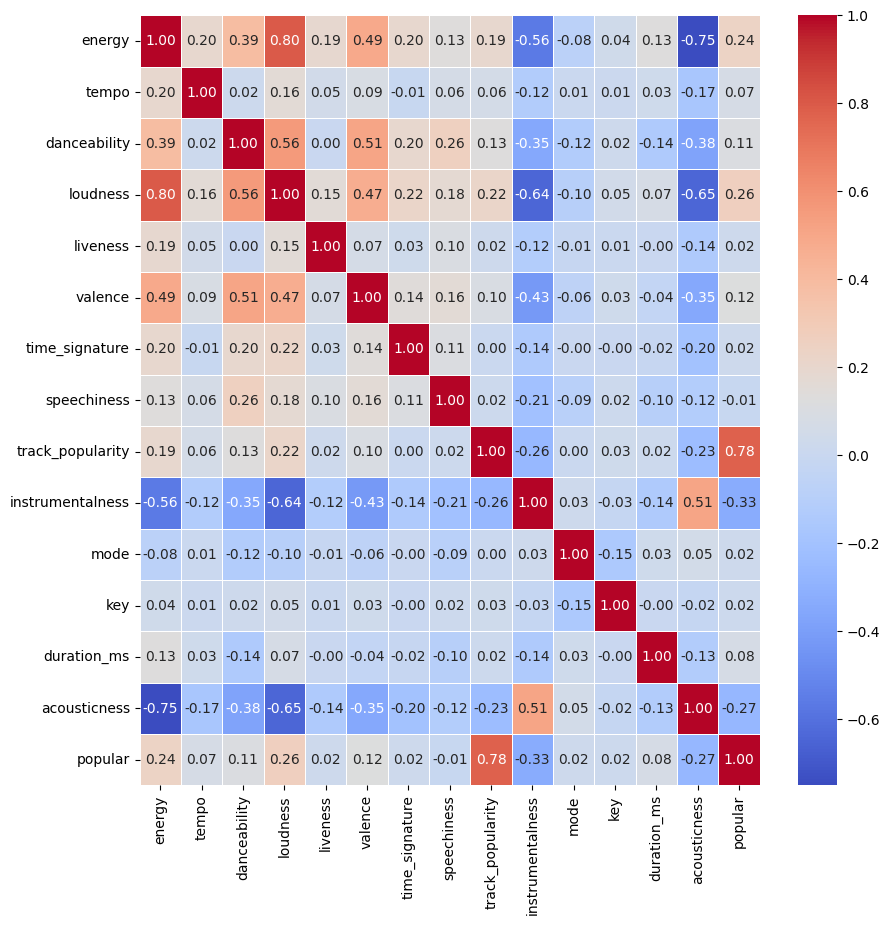

In [13]:
# Calculate the correlation matrix for all numeric columns in the dataset
corr = df.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

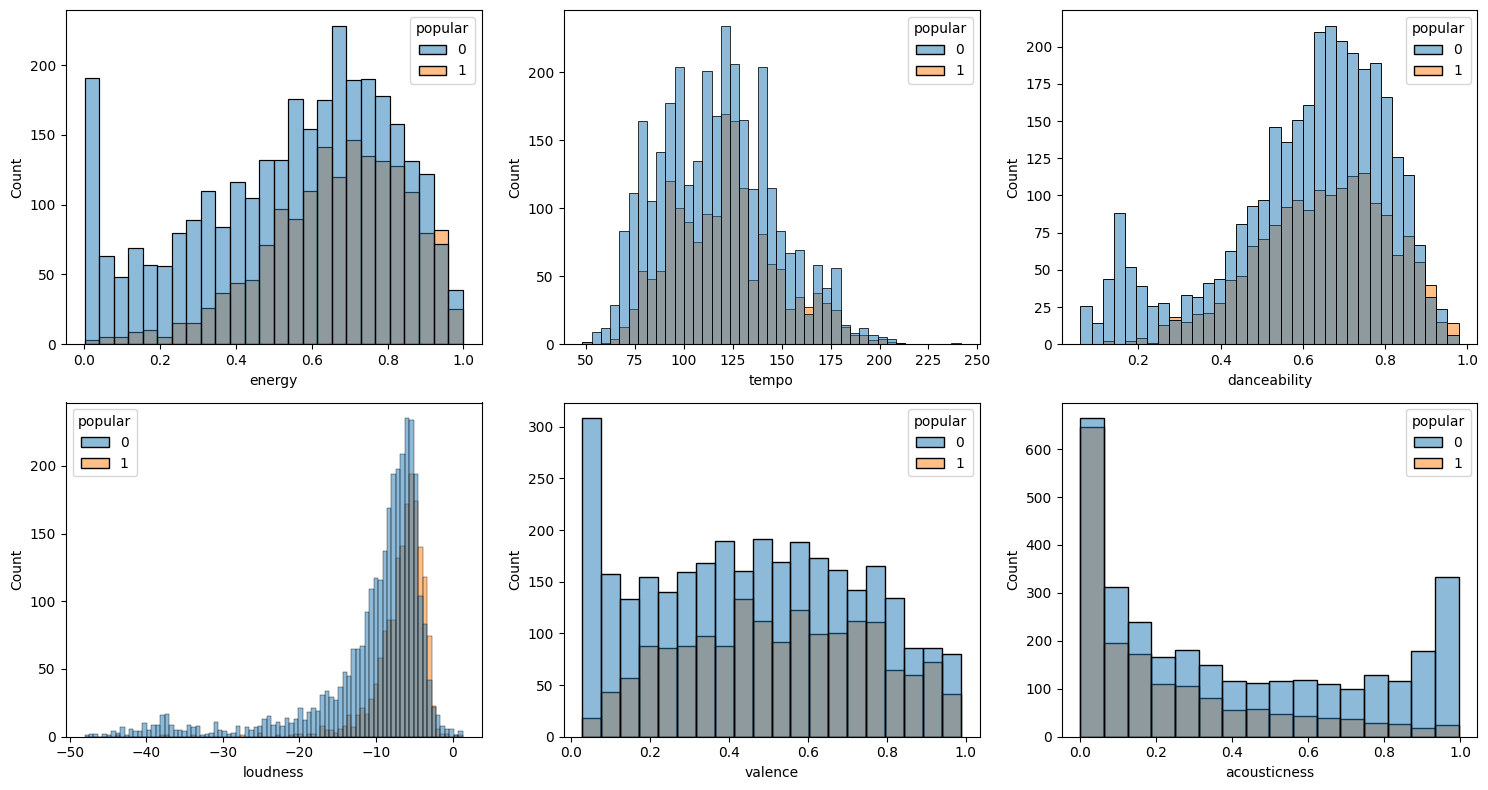

In [14]:
# Create a 2x3 grid of histograms for different audio features, colored by the 'popular' category to compare distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(data=df, x=df["energy"], hue="popular", ax=axes[0, 0])

sns.histplot(data=df, x=df["tempo"], hue="popular", ax=axes[0, 1])

sns.histplot(data=df, x=df["danceability"], hue="popular", ax=axes[0, 2])

sns.histplot(data=df, x=df["loudness"], hue="popular", ax=axes[1, 0])

sns.histplot(data=df, x=df["valence"], hue="popular", ax=axes[1, 1])

sns.histplot(data=df, x=df["acousticness"], hue="popular", ax=axes[1, 2])

plt.tight_layout()
plt.show()

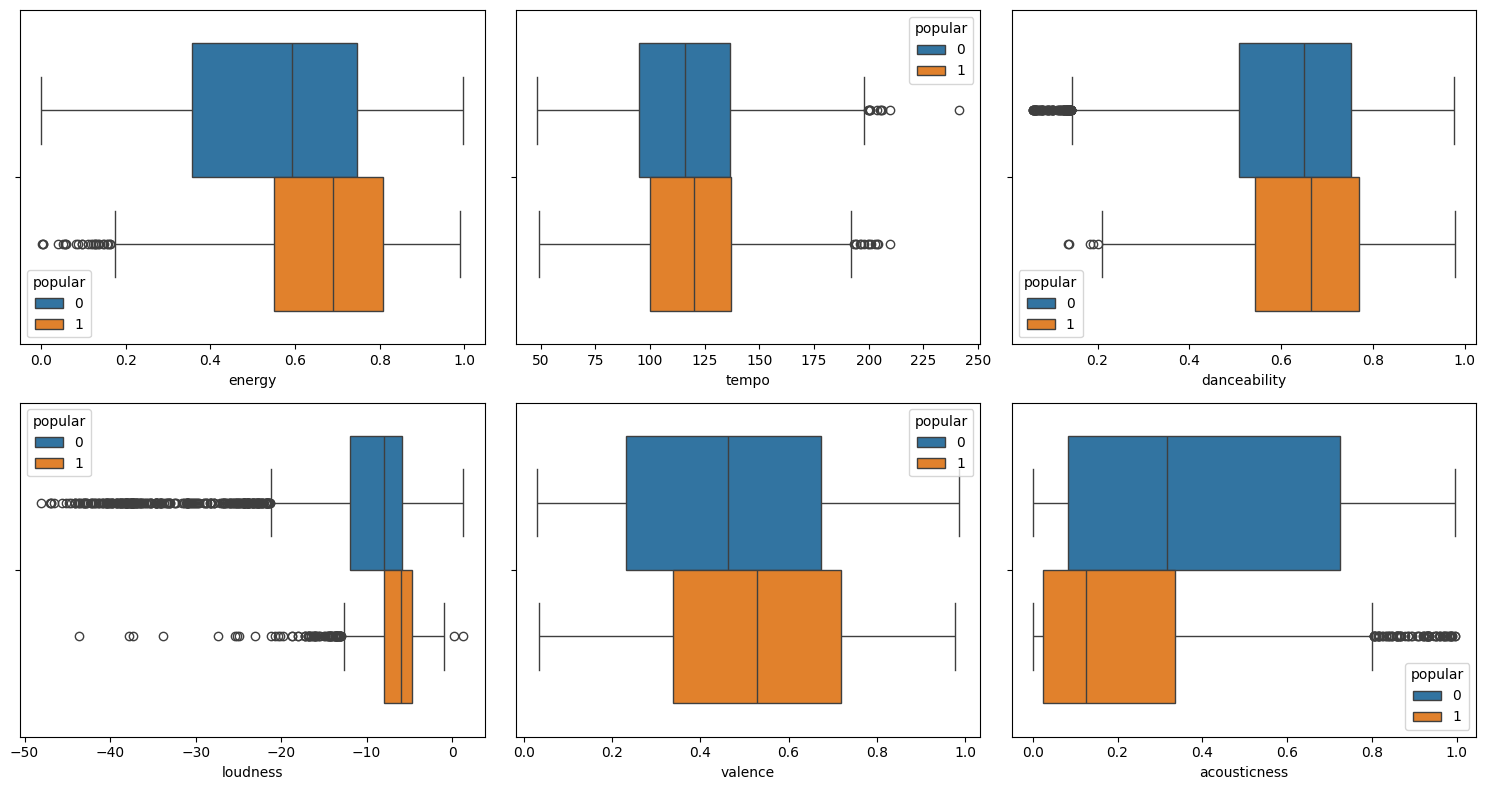

In [15]:
# Create a 2x3 grid of boxplots for different audio features, colored by the 'popular' category to compare distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(data=df, x=df["energy"], hue="popular", ax=axes[0, 0])

sns.boxplot(data=df, x=df["tempo"], hue="popular", ax=axes[0, 1])

sns.boxplot(data=df, x=df["danceability"], hue="popular", ax=axes[0, 2])

sns.boxplot(data=df, x=df["loudness"], hue="popular", ax=axes[1, 0])

sns.boxplot(data=df, x=df["valence"], hue="popular", ax=axes[1, 1])

sns.boxplot(data=df, x=df["acousticness"], hue="popular", ax=axes[1, 2])

plt.tight_layout()
plt.show()

<Axes: xlabel='instrumentalness', ylabel='Count'>

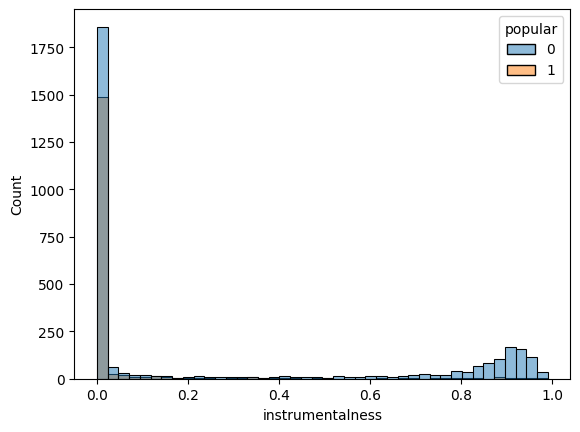

In [16]:
# Visualize the distribution for instrumentalness
sns.histplot(data=df, x=df["instrumentalness"], hue="popular")

In [17]:
# Histogram above show the
df['is_instrumental'] = (df['instrumentalness'] > 0.4).astype(int)

In [18]:
# Convert album release date to datetime format for time-based analysis
df['release_date'] = pd.to_datetime(df['track_album_release_date'], format='mixed')

<Axes: xlabel='release_date'>

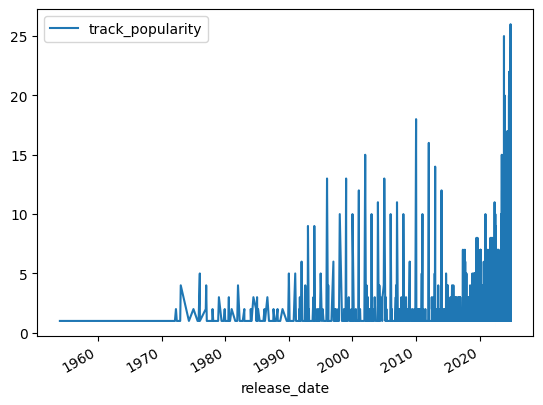

In [19]:
# Plot the number of unique track popularities over release dates
df.groupby(df['release_date']).nunique()[['track_popularity']].plot()

In [20]:
# Calculate number of years since each track's release date
df['year_since_release'] = (pd.Timestamp.now() - df['release_date']).dt.days / 365.25

In [21]:
# Create interaction features between energy, danceability, and valence
df['energy_danceability'] = df['energy'] * df['danceability']
df['valence_energy'] = df['valence'] * df['energy']

In [22]:
# Add a polynomial feature: energy squared
df['energy_squared'] = df['energy'] ** 2

# Feature Selection

<Axes: >

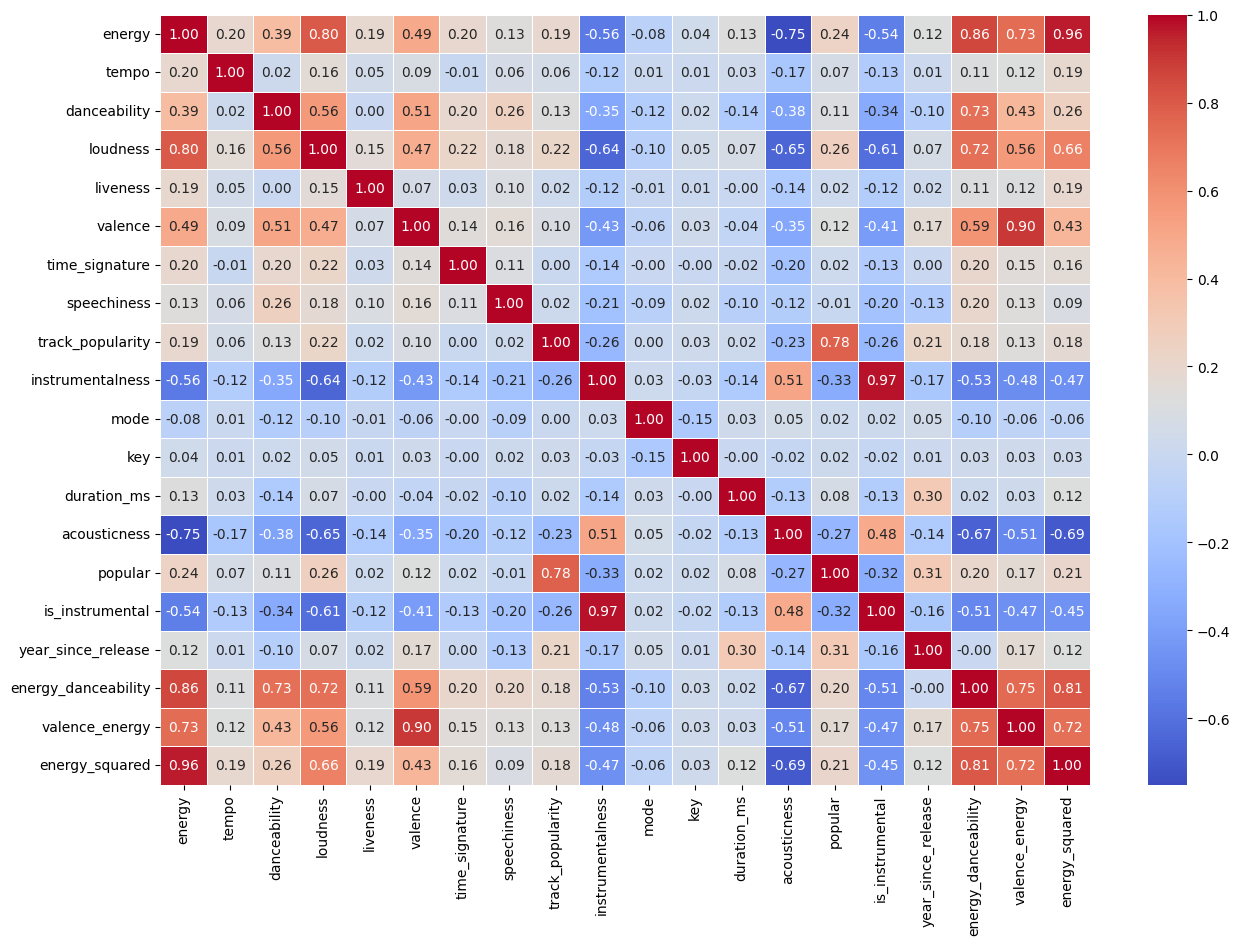

In [23]:
# Visualization of the correlation matrix after adding new features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

In [24]:
# One-hot encode categorical columns ('playlist_genre', 'playlist_subgenre')
# and create a DataFrame with meaningful column names

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

cat_cols = ['playlist_genre', 'playlist_subgenre']

# Initialize one-hot encoder (dense output)
encoder = OneHotEncoder(sparse_output=False)

# Fit encoder on categorical columns and transform them into numerical one-hot arrays
x = encoder.fit_transform(df[cat_cols])

# Flatten the encoder categories to create descriptive column names
flat_cat = [f"{fl}--{c}" for fl, subset in zip(cat_cols, encoder.categories_) for c in subset]

# Convert one-hot arrays into a DataFrame with original index
x_cat = pd.DataFrame(x, columns=flat_cat, index=df.index)

In [25]:
# x_cat.dropna(inplace=True)

# Concatinate categirical features
x_cat = pd.concat([x_cat, df['is_instrumental']], axis=1)

In [26]:
# List of continuous features
cont_cols = ['energy', 'loudness', 'valence', 'acousticness', 'danceability', 'tempo', 'duration_ms', 'energy_danceability', 'valence_energy', 'energy_squared', 'year_since_release']

# Use RobustScaler instead of StandardScaler because loudness has extreme outliers
# Initialize RobustScaler
scaler = RobustScaler()
x_cont = df[cont_cols]
# Fit scaler on continuous columns and transform
x_cont_norm = scaler.fit_transform(x_cont)
x_cont_norm = pd.DataFrame(x_cont_norm, columns=cont_cols, index=df.index)

# Scaled features
X_norm = pd.concat([x_cat, x_cont_norm], axis=1)

# Not scaled features
X = pd.concat([x_cat, x_cont], axis=1)

# Target feature
y = df['popular']

# Classification

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import plotly.express as px

## Logistic Regression

In [28]:
# Split the dataset into training and test sets (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=0.3, random_state=42)

# Initialize a logistic regression model with L1 regularization, class balancing, and fixed random state
log_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=101, class_weight='balanced')

# Fit the model on the training data
log_model.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,101
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [29]:
# Predict class labels and probabilities on the test set
y_pred = log_model.predict(X_test)
y_pred_score = log_model.predict_proba(X_test)[:, 1]

# Print classification metrics (precision, recall, f1-score) and ROC AUC score
print(classification_report(y_test, y_pred, digits=4))
print("roc_auc", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0     0.9135    0.8844    0.8987       943
           1     0.7966    0.8439    0.8196       506

    accuracy                         0.8703      1449
   macro avg     0.8551    0.8641    0.8591      1449
weighted avg     0.8727    0.8703    0.8711      1449

roc_auc 0.8641424852983708


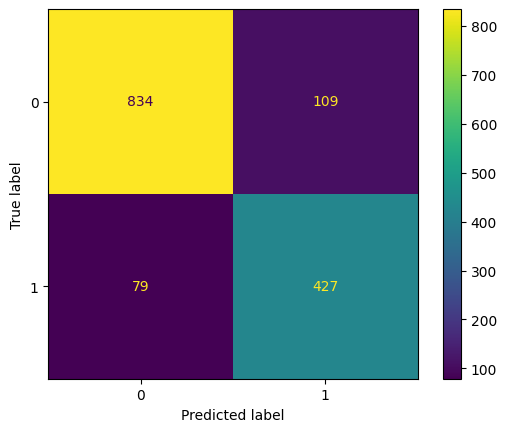

In [30]:
# Compute and display the confusion matrix
reg_cm = confusion_matrix(y_test, y_pred, labels=log_model.classes_)

reg_disp = ConfusionMatrixDisplay(confusion_matrix=reg_cm, display_labels=log_model.classes_)
reg_disp.plot()

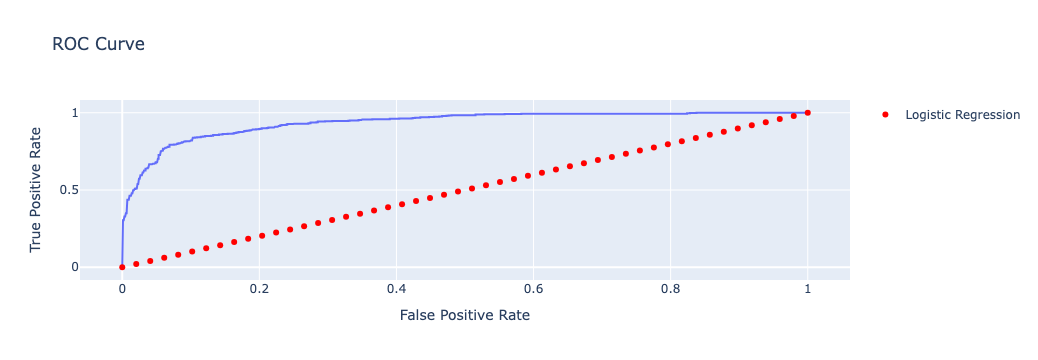

In [31]:
# Compute ROC curve (false positive rate and true positive rate)
fpr, tpr, _ = roc_curve(y_test, y_pred_score)

# Prepare dataframes for plotting
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
ref_df = pd.DataFrame({'fpr': np.linspace(0, 1, 50), 'tpr': np.linspace(0, 1, 50)})

# Plot ROC curve using Plotly with a reference diagonal line
fig = px.line(roc_df, x='fpr', y='tpr', title='ROC Curve', labels={'fpr': 'False Positive Rate', 'tpr': 'True Positive Rate'})
fig.add_scatter(x=ref_df['fpr'], y=ref_df['tpr'], mode='markers', name='Logistic Regression', marker=dict(color='red'))
fig.show()

### Try different classification models and compare results.

## Random Forest Classifier

In [36]:
# Split the unnormalized dataset into training and test sets (70% train, 30% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

rand_model = RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        class_weight='balanced',
        criterion='gini',
        min_samples_split=17,
        n_jobs=-1,
        max_features=0.3
)

rand_model.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,17
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,0.3
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_rand_pred = rand_model.predict(X_test)
y_rand_score = rand_model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_rand_pred, digits=4))
print("roc_auc", roc_auc_score(y_test, y_rand_pred))

              precision    recall  f1-score   support

           0     0.9093    0.9141    0.9117       943
           1     0.8383    0.8300    0.8342       506

    accuracy                         0.8847      1449
   macro avg     0.8738    0.8721    0.8729      1449
weighted avg     0.8845    0.8847    0.8846      1449

roc_auc 0.8720717246698159


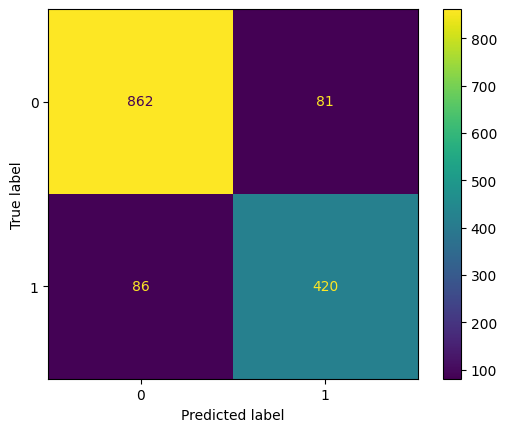

In [38]:
rand_cm = confusion_matrix(y_test, y_rand_pred, labels=rand_model.classes_)

rand_disp = ConfusionMatrixDisplay(confusion_matrix=rand_cm, display_labels=rand_model.classes_)
rand_disp.plot()

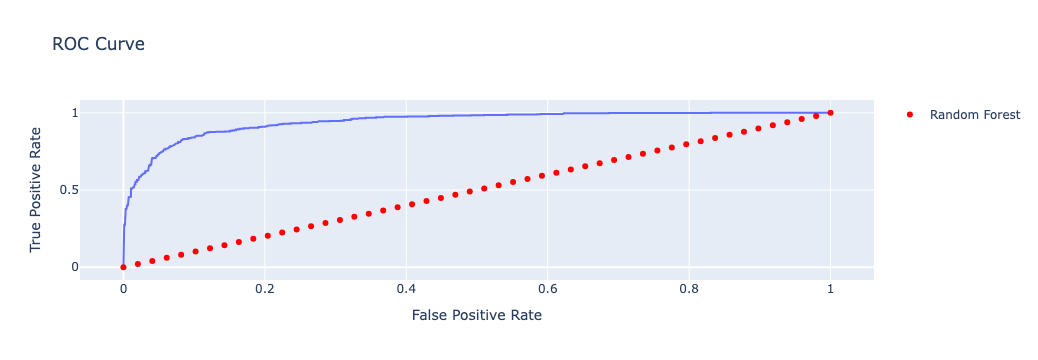

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_rand_score)

roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
ref_df = pd.DataFrame({'fpr': np.linspace(0, 1, 50), 'tpr': np.linspace(0, 1, 50)})

fig = px.line(roc_df, x='fpr', y='tpr', title='ROC Curve', labels={'fpr': 'False Positive Rate', 'tpr': 'True Positive Rate'})
fig.add_scatter(x=ref_df['fpr'], y=ref_df['tpr'], mode='markers', name='Random Forest', marker=dict(color='red'))
fig.show()

## XGBoost Classifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=0.3, random_state=101)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
y_xgb_pred = xgb_model.predict(X_test)
y_xgb_score = xgb_model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_xgb_pred, digits=4))
print("roc_auc", roc_auc_score(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0     0.8990    0.9247    0.9117       943
           1     0.8518    0.8063    0.8284       506

    accuracy                         0.8834      1449
   macro avg     0.8754    0.8655    0.8700      1449
weighted avg     0.8825    0.8834    0.8826      1449

roc_auc 0.8655162440952473


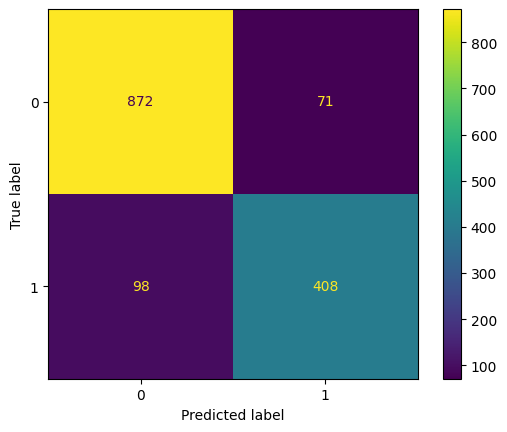

In [42]:
xgb_cm = confusion_matrix(y_test, y_xgb_pred, labels=xgb_model.classes_)

xgb_disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_model.classes_)
xgb_disp.plot()

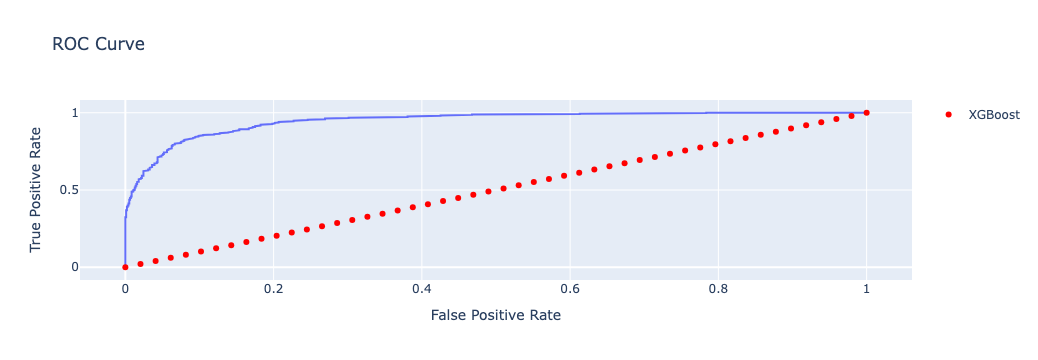

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_xgb_score)

roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
ref_df = pd.DataFrame({'fpr': np.linspace(0, 1, 50), 'tpr': np.linspace(0, 1, 50)})

fig = px.line(roc_df, x='fpr', y='tpr', title='ROC Curve', labels={'fpr': 'False Positive Rate', 'tpr': 'True Positive Rate'})
fig.add_scatter(x=ref_df['fpr'], y=ref_df['tpr'], mode='markers', name='XGBoost', marker=dict(color='red'))
fig.show()

## Decision Tree Classifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y, test_size=0.3, random_state=101)

tree_model = DecisionTreeClassifier(max_depth=12, min_samples_split=5, min_samples_leaf=5)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,12
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
y_tree_pred = tree_model.predict(X_test)
y_tree_score = tree_model.predict_proba(X_test)[:, 1]


print(classification_report(y_test, y_tree_pred, digits=4))
print("roc_auc", roc_auc_score(y_test, y_tree_pred))

              precision    recall  f1-score   support

           0     0.8574    0.9438    0.8985       943
           1     0.8710    0.7075    0.7808       506

    accuracy                         0.8613      1449
   macro avg     0.8642    0.8257    0.8397      1449
weighted avg     0.8622    0.8613    0.8574      1449

roc_auc 0.8256531379543044


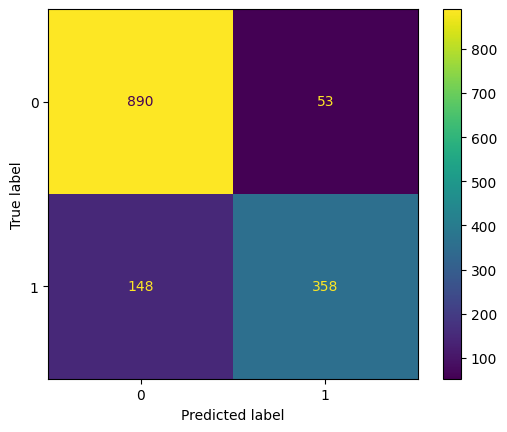

In [46]:
tree_cm = confusion_matrix(y_test, y_tree_pred, labels=tree_model.classes_)

tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm, display_labels=tree_model.classes_)
tree_disp.plot()

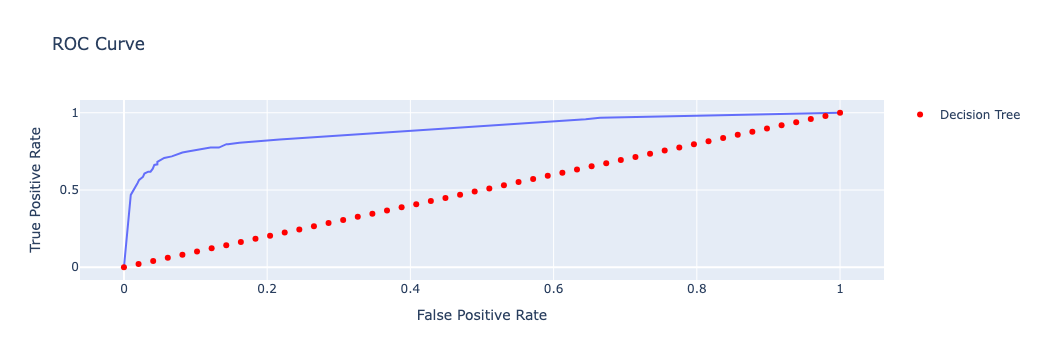

In [47]:
fpr, tpr, _ = roc_curve(y_test, y_tree_score)

roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
ref_df = pd.DataFrame({'fpr': np.linspace(0, 1, 50), 'tpr': np.linspace(0, 1, 50)})

fig = px.line(roc_df, x='fpr', y='tpr', title='ROC Curve', labels={'fpr': 'False Positive Rate', 'tpr': 'True Positive Rate'})
fig.add_scatter(x=ref_df['fpr'], y=ref_df['tpr'], mode='markers', name='Decision Tree', marker=dict(color='red'))
fig.show()